# 유투브 랭킹 시각화

- with 1 ~ 10 페이지 크롤링한 '유투브랭킹.csv' 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False 
plt.rcParams['font.family'] = 'Malgun Gothic'


In [2]:
df = pd.read_csv('유투브랭킹.csv')
df.head(3)

,순위,장르,채널명,구독자수,조회수,비디오수
0,1,음악/댄스/가수,BLACKPINK,"70,200,000","21,457,090,000",395
1,2,음악/댄스/가수,HYBE LABELS,"63,000,000","20,496,840,000",725
2,3,음악/댄스/가수,BANGTANTV,"61,500,000","14,077,940,000","1,646"


In [3]:
df['구독자수'] = df['구독자수'].str.replace(',','').astype(int)
df['조회수'] = df['조회수'].str.replace(',','').astype(np.int64)
df['비디오수'] = df['비디오수'].str.replace(',','').astype(int)
df.head()

,순위,장르,채널명,구독자수,조회수,비디오수
0,1,음악/댄스/가수,BLACKPINK,70200000,21457090000,395
1,2,음악/댄스/가수,HYBE LABELS,63000000,20496840000,725
2,3,음악/댄스/가수,BANGTANTV,61500000,14077940000,1646
3,4,음악/댄스/가수,SMTOWN,29300000,23016410000,3779
4,5,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],26500000,11052880000,223


- 구독자수 top 20

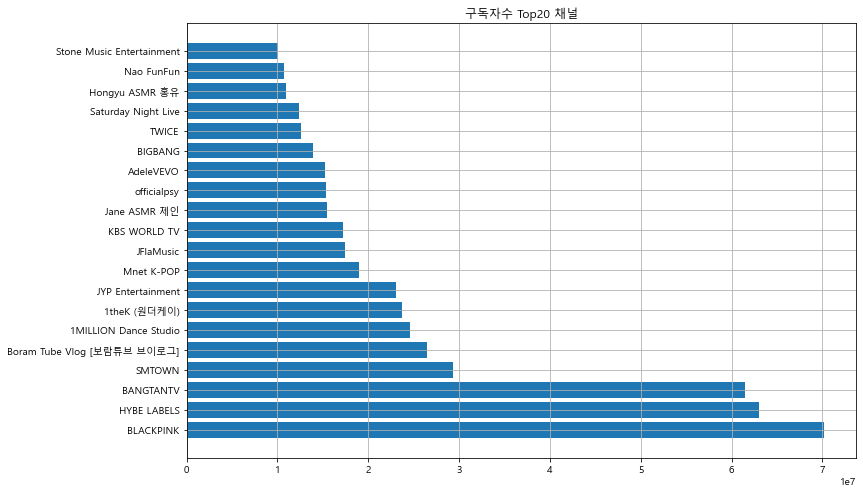

In [4]:
# 시각화 복습
plt.figure(figsize=(12,8)) # for what?
plt.barh(df.채널명.head(20), df.구독자수.head(20))      # X,Y자리  # barh : 가로막대
plt.title('구독자수 Top20 채널')
plt.grid()
plt.show()

In [5]:
df2 = df[['채널명','구독자수']].head(20)   #df2는 df에서 채널명과 구독자수를 20개만 가져옴 

In [6]:
df2

,채널명,구독자수
0,BLACKPINK,70200000
1,HYBE LABELS,63000000
2,BANGTANTV,61500000
3,SMTOWN,29300000
4,Boram Tube Vlog [보람튜브 브이로그],26500000
5,1MILLION Dance Studio,24600000
6,1theK (원더케이),23700000
7,JYP Entertainment,23000000
8,Mnet K-POP,19000000
9,JFlaMusic,17400000


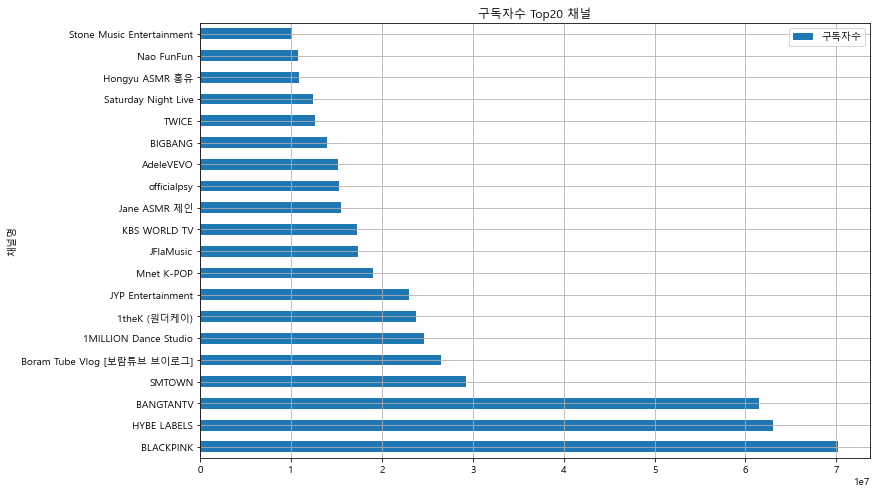

In [7]:
df2.set_index('채널명', inplace = True)
df2.plot(kind='barh', grid = True, figsize=(12,8))
plt.title('구독자수 Top20 채널')
plt.show()


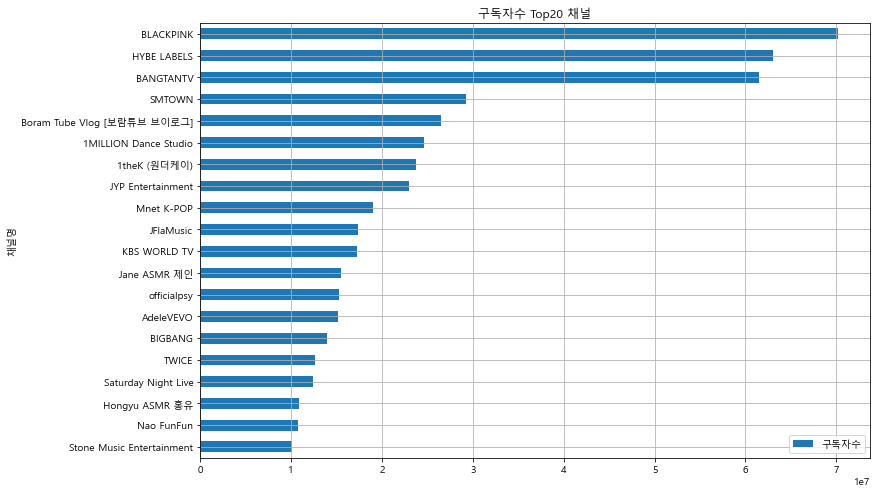

In [8]:
df2.sort_values(by='구독자수').plot(kind='barh', grid = True, figsize=(12,8))
plt.title('구독자수 Top20 채널')
plt.show()


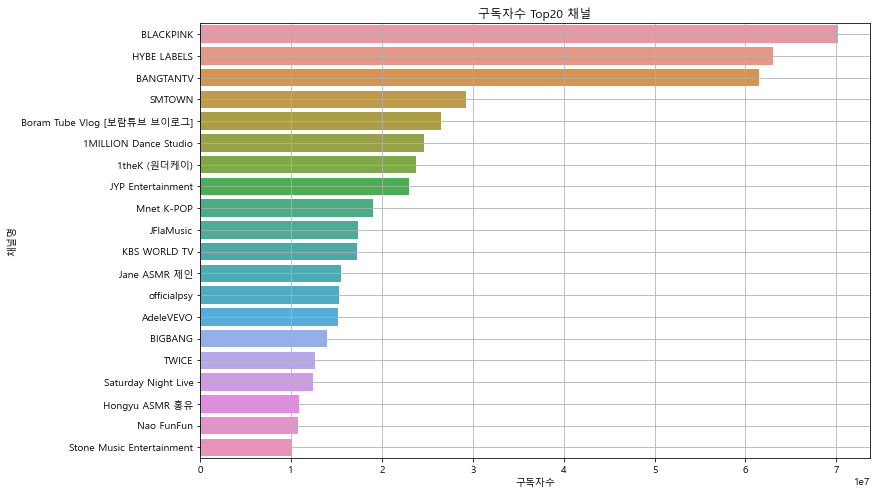

In [9]:
import seaborn as sns 

plt.figure(figsize=(12,8))
sns.barplot(y='채널명', x='구독자수', data=df.head(20))
plt.title('구독자수 Top20 채널')
plt.grid()
plt.show()


- 조회수 기준 Top20 채널

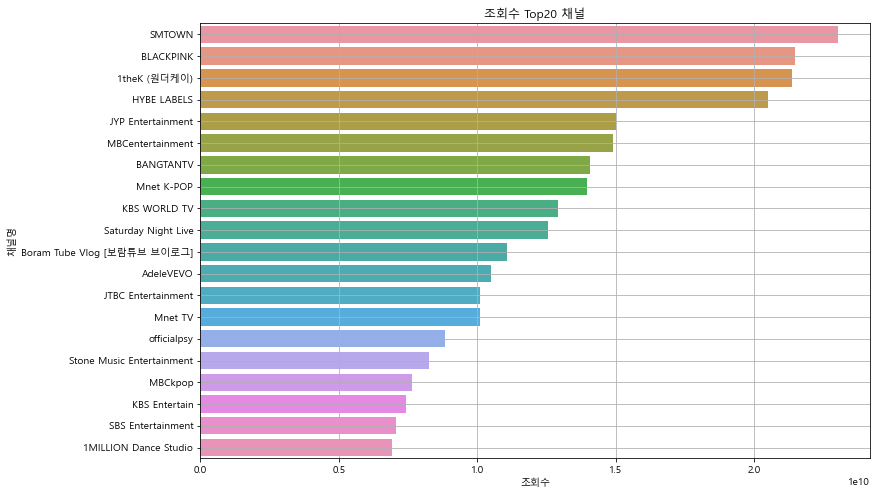

In [10]:
plt.figure(figsize=(12,8))
df2 = df.sort_values(by='조회수', ascending=False).head(20)
sns.barplot(y='채널명', x='조회수', data=df2)
plt.title('조회수 Top20 채널')
plt.grid()
plt.show()

- 비디오수 기준 Top 20

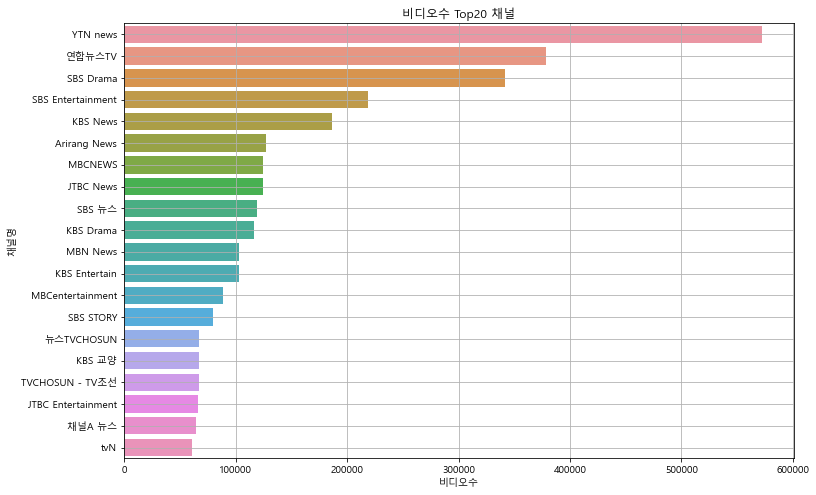

In [11]:
plt.figure(figsize=(12,8)) # for what?
df2 = df.sort_values(by='비디오수', ascending=False).head(20)
sns.barplot(y='채널명', x='비디오수', data=df2)
plt.title('비디오수 Top20 채널')
plt.grid()
plt.show()

- 카데고리(장르)별 Top20

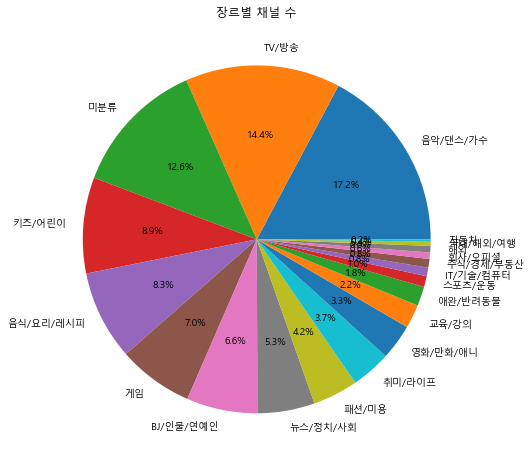

In [15]:
df3 =  df.장르.value_counts().to_frame().head(20)

plt.figure(figsize=(12,8))
plt.pie('장르', labels=df3.index, data=df3, autopct='%.1f%%')
plt.title('장르별 채널 수')
plt.show()

- 카데고리(장르)별 구독자 수 합계

In [17]:
df4 = df.groupby('장르')['구독자수'].agg(['count','sum'])
df4.columns = ['채널수', '구독자수']
df4.sort_values(by='구독자수', ascending=False, inplace=True)
df4

,채널수,구독자수
장르,,
음악/댄스/가수,172,715420000
키즈/어린이,89,270640000
TV/방송,144,241660000
음식/요리/레시피,83,185020000
미분류,126,133330000
BJ/인물/연예인,66,93710000
뉴스/정치/사회,53,75100000
게임,70,70960000
취미/라이프,37,48930000


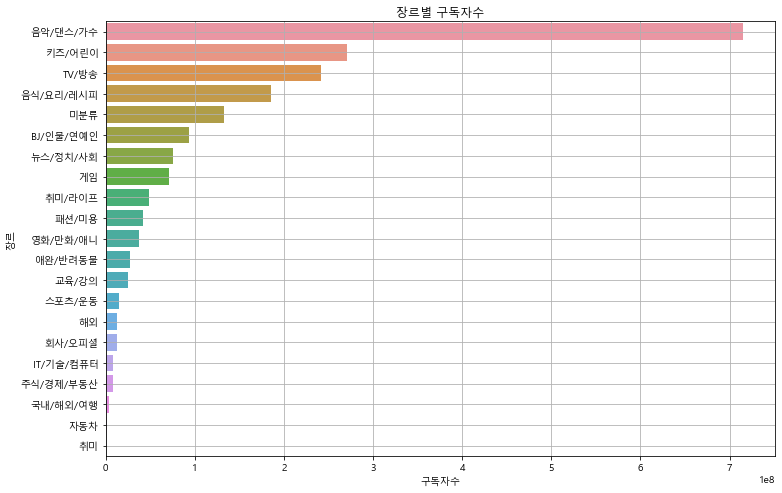

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수', y=df4.index, data=df4)
plt.title('장르별 구독자수')
plt.grid()
plt.show()

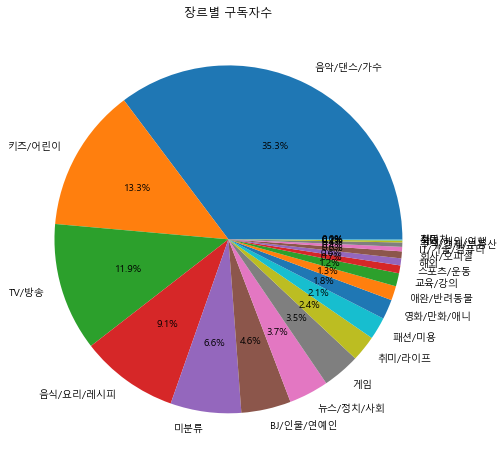

In [22]:
plt.figure(figsize=(12,8))
plt.pie('구독자수', labels=df4.index, data=df4, autopct='%.1f%%')
plt.title('장르별 구독자수')
plt.show()